https://www.kaggle.com/c/integer-sequence-learning

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json

from tqdm.auto import tqdm
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Data

In [2]:
train = pd.read_csv('train.csv')
print(len(train))
train.head()

113845


,Id,Sequence
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787..."


In [3]:
test = pd.read_csv('test.csv')
print(len(test))
test.head()

113845


,Id,Sequence
0,1,"1,0,0,2,24,552,21280,103760,70299264,579285324..."
1,2,"1,1,5,11,35,93,269,747,2115,5933,16717,47003,1..."
2,4,"0,1,101,2,15,102,73,3,40,16,47,103,51,74,116,4..."
3,5,"1,4,14,23,42,33,35,34,63,66,87,116,84,101,126,..."
4,6,"1,1,2,5,4,2,6,13,11,4,10,10,12,6,8,29,16,11,18..."


In [4]:
data = pd.DataFrame(pd.concat([train['Sequence'], test['Sequence']]), columns=['Sequence'])

In [5]:
print(len(data))
data.drop_duplicates(inplace=True)
print(len(data))

227690
225567


In [6]:
data['Sequence'] = data['Sequence'].progress_apply(lambda x: list(map(int, x.split(','))))

In [7]:
data['Len'] = data['Sequence'].progress_apply(len)

In [8]:
print('Max:   ', np.max(data['Len']))
print('99th:  ', np.quantile(data['Len'], 0.99))
print('95th:  ', np.quantile(data['Len'], 0.95))
print('75th:  ', np.quantile(data['Len'], 0.75))
print('Median:', np.quantile(data['Len'], 0.50))
print('25th:  ', np.quantile(data['Len'], 0.25))
print('5th:  ', np.quantile(data['Len'], 0.05))
print('1st:   ', np.quantile(data['Len'], 0.01))
print('Min:   ', np.min(data['Len']))

Max:    348
99th:   105.0
95th:   99.0
75th:   58.0
Median: 34.0
25th:   18.0
5th:   7.0
1st:    4.0
Min:    1


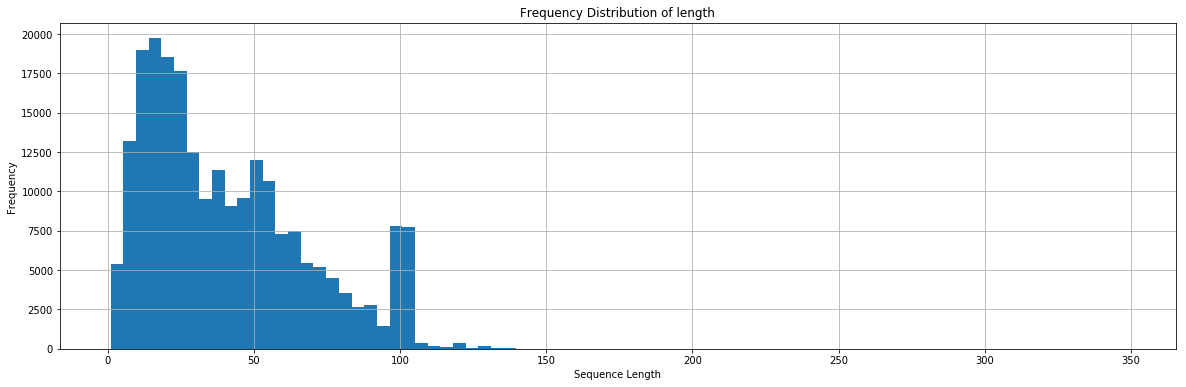

In [9]:
fig, ax = plt.subplots(figsize=(20,6))
ax.hist(data['Len'].values, bins=80)
ax.set_title('Frequency Distribution of length')
ax.set_xlabel('Sequence Length')
ax.set_ylabel('Frequency')
ax.grid()

In [10]:
data.sort_values('Len', inplace=True)

In [11]:
d = data[data['Len'] >= 5]['Sequence'].values.tolist()

In [12]:
subseq_list = []
for i in tqdm(range(len(d))):
    for j in range(i+1, len(d)):
        if d[i] == d[j][:len(d[i])]:
            subseq_list.append((i, j))

In [16]:
sub = list(set([x[0] for x in subseq_list]))
print(len(sub))

1984


In [17]:
d_ = []
for i in range(len(d)):
    if i not in sub:
        d_.append(d[i])

In [18]:
print(len(d_))

220613


In [19]:
json.dump(d_, open('data.json', 'w'))